In [62]:
%pylab inline
from scipy.ndimage.interpolation import shift
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Assignment_1, Exercise 3

The goal of this assignment is to compensate the shift for the following set of 10 signals using **Dynamic Time Warping (DTW)**

There are five tasks to achieve that are described in detail below.

# LOAD THE DATA

(10, 599)


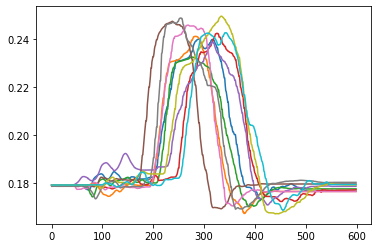

In [63]:
#List to store demonstraitons
Signals=[]

#Signal Index
file_id=[0,1,2,3,4,5,6,7,8,9]
filename = './Signals/signal_'
              
N=599
time = np.linspace(0, N, num=N)
#Open each file
for f_id in file_id:
    #List to store temporaly the data of each file
    Dem_i=[]
    #Concatenate file name to be opened
    file_name=filename+str(f_id)+'.txt'
    data = np.loadtxt(file_name, delimiter=' ', skiprows=1, dtype=str)
    Signals.append(np.asarray(data)[:,2].transpose())
Signals=np.asarray(Signals).astype(np.float32)

# Plots
fig = plt.figure(1)
for i in range(Signals.shape[0]):
    plt.plot(time,Signals[i,:])
print(Signals.shape)

# Task_1: DTW Matrix

Implement a function to get the DTW matrix

<div>
<img src="./DTW_Matrix.png" width="800"/>
</div>



In [64]:

#Implement your code here

def DTW_Matrix(signal_1,signal_2):
    signal_1_reverse=np.flip(signal_1)
    signal_2_reverse=np.flip(signal_2)
    r=len(signal_1)
    c=len(signal_2)

    M=np.zeros((r, c))

    for i in range(r-2,-1,-1):
      M[i,0]=abs(signal_1_reverse[i]-signal_2[0])+M[i+1,0]
    for i in range(1,c):
      M[r-1,i]=abs(signal_1[0]-signal_2[i])+M[r-1,i-1]
    for i in range(r-2,-1,-1):
      for j in range(1,c):
        M[i,j]=abs(signal_1_reverse[i]-signal_2[j])+min(M[i+1,j],M[i+1,j-1],M[i,j-1])
    return M


s1=[1,4,5,10,9,3,2,6,8,4]
s2=[1,7,3,4,1,10,5,4,7,4]
DTW_Matrix(s1,s2)






array([[42., 24., 20., 17., 20., 24., 19., 18., 18., 15.],
       [39., 21., 19., 17., 20., 18., 18., 19., 15., 18.],
       [32., 20., 14., 13., 17., 16., 15., 15., 14., 16.],
       [27., 19., 11., 12., 12., 20., 14., 13., 17., 18.],
       [26., 14., 10., 11., 13., 16., 11., 12., 16., 17.],
       [24., 10., 14., 16., 19.,  9., 12., 17., 18., 21.],
       [16.,  8., 12., 11., 14.,  8., 13., 18., 16., 21.],
       [ 7.,  5.,  5.,  5.,  8., 12., 12., 13., 15., 16.],
       [ 3.,  3.,  4.,  4.,  7., 13., 14., 14., 17., 17.],
       [ 0.,  6.,  8., 11., 11., 20., 24., 27., 33., 36.]])

# Task_2: Final Distance Calculation

Implement the warping path function to calculate the final Distance



<div>
<img src="./DTW_Path.png" width="800"/>
</div>

<div>
<img src="./DTW_distance.png" width="800"/>
</div>

In [83]:
#Implement your code here

print(DTW_Matrix(s1,s2))

def DTW_distance(M):
    d=[]
    i,j = 0, len(M[0])-1

    while(i<len(M)-1 and j>=0):
      d.append(M[i, j])
      n1,n2,n3 = M[i,j-1],M[i+1,j-1],M[i+1,j]
      minval=min(n1,n2,n3)
      if(minval==n1):
        j-=1
      elif(minval==n2):
        i+=1
        j-=1
      elif(minval==n3):
        i+=1

    while(i==len(M)-1 and j >= 0):
      d.append(M[i, j])
      j-=1
    
    while(i>=len(M)-1 and j == 0):
      d.append(M[i, j])
      i+=1
      
    #print(d)
    return average(d)

DTW_distance(DTW_Matrix(s1,s2))


[[42. 24. 20. 17. 20. 24. 19. 18. 18. 15.]
 [39. 21. 19. 17. 20. 18. 18. 19. 15. 18.]
 [32. 20. 14. 13. 17. 16. 15. 15. 14. 16.]
 [27. 19. 11. 12. 12. 20. 14. 13. 17. 18.]
 [26. 14. 10. 11. 13. 16. 11. 12. 16. 17.]
 [24. 10. 14. 16. 19.  9. 12. 17. 18. 21.]
 [16.  8. 12. 11. 14.  8. 13. 18. 16. 21.]
 [ 7.  5.  5.  5.  8. 12. 12. 13. 15. 16.]
 [ 3.  3.  4.  4.  7. 13. 14. 14. 17. 17.]
 [ 0.  6.  8. 11. 11. 20. 24. 27. 33. 36.]]


8.666666666666666

# Task 3: DTW alignment

Implement a function to compensate the shift between two signals using DTW
* Use the DTW_Matrix function from task 1

<div>
<img src="./DTW_alignment.png" width="800"/>
</div>

In [88]:
#Implement your code here


def DTW_alignment(signal_1, signal_2):
    M = DTW_Matrix(signal_1, signal_2)
    New_signal_1 = []
    New_signal_2 = []
    signal_1_reverse = np.flip(signal_1)

    i,j = 0, len(M[0])-1

    while(i<len(M)-1 and j>=0):
      New_signal_1.append(signal_1_reverse[i])
      New_signal_2.append(signal_2[j])
      n1,n2,n3 = M[i,j-1],M[i+1,j-1],M[i+1,j]
      minval=min(n1,n2,n3)
      if(minval==n1):
        j-=1
      elif(minval==n2):
        i+=1
        j-=1
      elif(minval==n3):
        i+=1

    while(i==len(M)-1 and j >= 0):
        New_signal_1.append(signal_1_reverse[i])
        New_signal_2.append(signal_2[j])      
        j-=1
    
    while(i>=len(M)-1 and j == 0):
        New_signal_1.append(signal_1_reverse[i])
        New_signal_2.append(signal_2[j])   
        i+=1
      
    return np.flip(New_signal_1), np.flip(New_signal_2)

DTW_alignment(s1,s2)

(array([ 1,  4,  4,  4,  5, 10,  9,  3,  2,  6,  8,  4]),
 array([ 1,  7,  3,  4,  1, 10, 10,  5,  4,  7,  7,  4]))

# Task 4: Test the functions "DTW_Matrix" and "DTW_distance"
- Calculate the similarity metric between the signals provided in the first cells (Signals) using the DTW_distance of task 2
- Use "Signals[0,:]" as signal reference
- Store the similarity value in the list "similarity"

similarity= [0.24669849557618215, 0.34306037791811667, 0.1528450826253103, 0.29350914062708783, 0.3678710352081924, 0.3204980484296366, 0.5013485104355329, 0.38324288870880313, 0.2231302986498861]


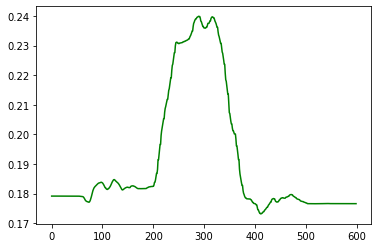

In [84]:

Signal_Reference=Signals[0,:]
plt.plot(time,Signal_Reference,'g')
similarity=[]
for i in [1,2,3,4,5,6,7,8,9]:
    #Implement your code here
    M=DTW_Matrix(Signal_Reference,Signals[i,:])
    similarity.append(DTW_distance(M))
print("similarity=",similarity)

#  Task 5: Plot the aligned signals 
Use the DTW_alignment function from task 3 to plot the aligned signals. Rember to use "Signals[0,:]" as reference.

**Make sure to indicate in the plot which one is the reference.**


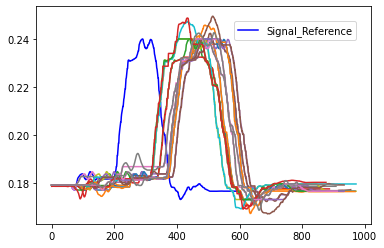

In [95]:
Signal_Reference=Signals[0,:]
plt.plot(time,Signal_Reference,'b',label="Signal_Reference")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc=1, borderaxespad=1.5)
for i in range(1,Signals.shape[0]):
    #Implement your code here
    signal_1, signal_2 = DTW_alignment(Signal_Reference,Signals[i,:])
    plt.plot(signal_1)
    plt.plot(signal_2)
    
